# Description

* Author: Seydou DIA & Simona MILADINOVA
* Creation date: 04-02-2022
* Last update : 04-02-2022<br>

This notebook is used to processed the data that is at our disposal.

In this notebook we process: 
* stock data
* carbon footprint data

# Setup

In [1]:
%matplotlib notebook
%load_ext autoreload


## Imports

In [2]:
# os related
from pathlib import Path
import os 

# data related
import pandas as pd
import missingno as msno
import datetime as dt
import numpy as np


# visual related
import matplotlib.pyplot as plt
# time related

## Paths

In [3]:
PROJECT_PATH = Path(os.getcwd()).parent

In [4]:
RAW_DATA = PROJECT_PATH / "RAW_DATA" 
PROC_DATA = PROJECT_PATH / "PROC_DATA"


# RAW FILES
CSV_FILE = RAW_DATA / "Individual_stock_data_csv.csv"
XLSX_FILE = RAW_DATA / "Individual_stock_data.xlsx"

# PROC FILES
PROC_STOCK = PROC_DATA / "proc_stock.csv"
PROC_CARBON = PROC_DATA / "proc_carbon.csv"
PROC_SP = PROC_DATA / "proc_sp.csv"
STOCK_2000 = PROC_DATA / "stock_2000.csv"


## Utils

In [5]:
def proc_df(raw_df, index="timestamp"):
    
    raw_df.rename(columns={"Unnamed: 0": index}, inplace=True)
    
    raw_cols = raw_df.columns
    raw_df.columns =  [x.lower() for x in raw_cols]
    return raw_df
    

In [6]:
def flatten(t):
    return [item for sublist in t for item in sublist]

# Notebook

## Stock data

In [7]:
def read_file(path, sep=",", index="timestamp"):
    """Function that reads data from processed file in PROC_DATA folder"""

    df = pd.read_csv(path, sep=",")
    if "timestamp" in df.columns:
        df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))
    df.set_index(index, inplace=True)

    return df

In [8]:
from fonctions import *

In [6]:
read_file(PROC_STOCK, index="timestamp")

,aapl,msft,amzn,fb,jpm,googl,jnj,wmt,v,bac,...,pwr,trip,unm,brk/b,goog,disck,fox,nws,ua,viab
timestamp,,,,,,,,,,,,,,,,,,,,,
1989-12-05,320.44,619.64,NaN,NaN,477.00,NaN,382.85,9096.68,NaN,512.75,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-12,256.35,589.29,NaN,NaN,488.96,NaN,386.18,9096.68,NaN,502.75,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-19,249.23,574.11,NaN,NaN,439.49,NaN,373.70,8839.71,NaN,475.61,...,NaN,NaN,172.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-26,252.79,610.71,NaN,NaN,450.91,NaN,379.52,8916.80,NaN,519.89,...,NaN,NaN,176.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,265.25,633.93,NaN,NaN,456.61,NaN,398.67,9687.71,NaN,532.74,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,233797.60,90791.38,508.66,14527.80,2583.25,13782.20,297373.40,1379.37,3493.60,...,571.17,115.48,803.75,952.11,233.21,356.00,87.40,91.57,37.81,209.88
2019-11-19,65322.11,239075.40,89504.06,521.35,14687.52,2613.88,14146.30,299295.70,1404.96,3477.76,...,562.46,116.26,780.03,944.09,236.20,365.31,91.59,91.30,37.88,219.14
2019-11-26,64831.50,242506.30,91758.56,520.43,14810.12,2614.70,14492.55,297548.30,1403.27,3521.05,...,558.04,119.25,803.22,943.53,235.85,387.25,90.97,91.64,39.97,225.00


In [8]:

df = pd.read_csv(CSV_FILE, sep=";")


In [9]:
df.rename(columns={"Unnamed: 0": "timestamp"}, inplace=True)

In [10]:
df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [11]:
df.set_index("timestamp", inplace=True)

In [12]:
df[["JEC", "BBT"]] = np.nan

In [13]:
for col in df.columns: 
    df[col] = df[col].apply(lambda x: str(x))
    df[col] = df[col].apply(lambda x: x.replace(",","."))
    df[col] = df[col].apply(lambda x: float(x))

In [14]:
df.columns = [col.lower() for col in df.columns]

In [15]:
# Verify that there isn't any wrong values
# df.where(df=='$$ER: E100.INVALID CODE OR EXPRESSION ENTERED').dropna(how='all').dropna(axis=1)

In [16]:
df.to_csv(PROC_STOCK)

<AxesSubplot:>

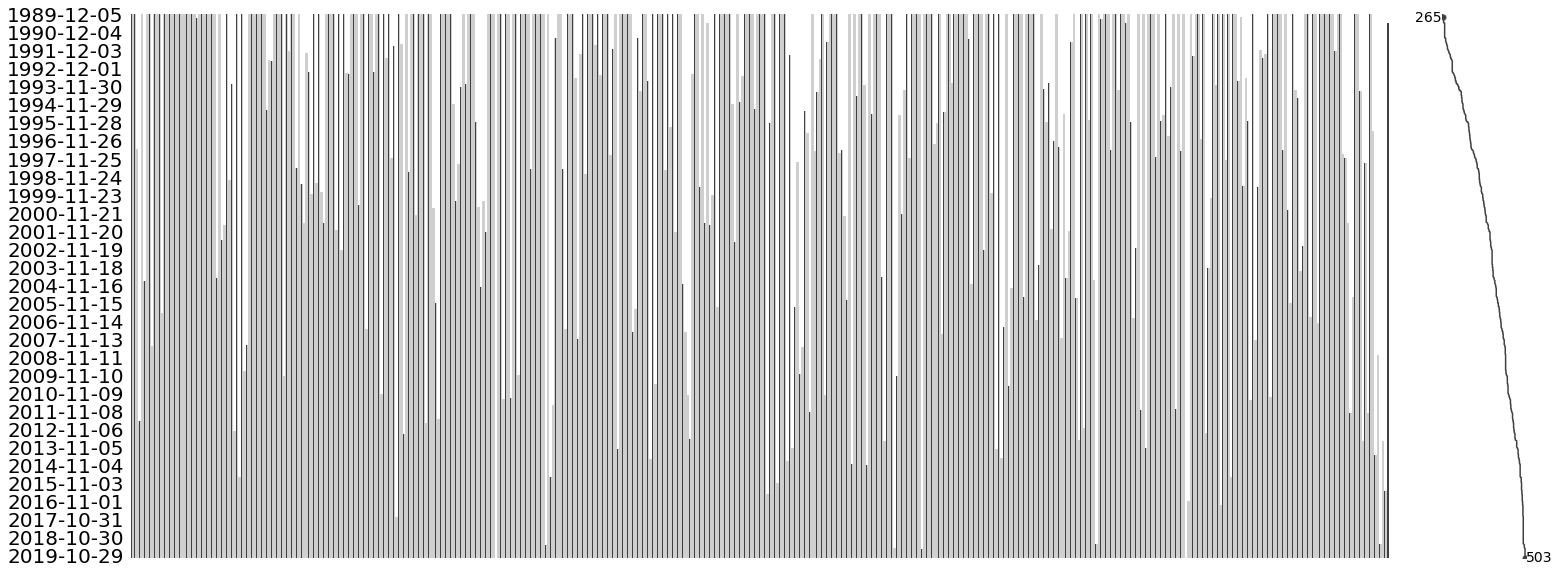

In [17]:
msno.matrix(df, freq="364D")



* Seulement 265 titres avec des valeurs entre 1989 et 2019
* On propose de fixer un seuil de semaine manquante


In [18]:
len(df.index)

1567

In [19]:

seuil_mois = 20 
seuil_an = 11

# Retrieve number of Nan in each column
null_series = df.isnull().sum().sort_values(ascending=False)

# Set threshold at which we will use the data
use_col = null_series[null_series < seuil_an*52].index

In [20]:

missing_week = [len(null_series[null_series <= seuil]) for seuil in range(len(df))] 


In [21]:
start_date = dt.datetime(2000,1,1)


In [22]:
df_info = pd.DataFrame(index=df.index, data=missing_week, columns=["available_assets"])

Text(0.5, 1.0, 'start year: 2000\nAvailable assets 381')

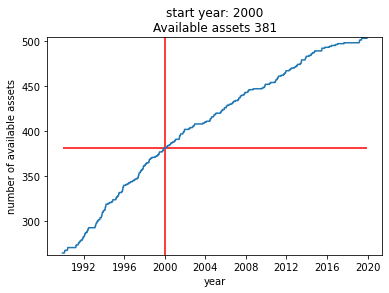

In [23]:
plt.figure()
plt.plot(df.index, missing_week)
plt.xlabel("year")
plt.ylabel("number of available assets")
plt.vlines(x=start_date, ymin=263,ymax=600, color="red")
plt.ylim(263,504)

threshold = df_info.loc[str(start_date.year)].values[0][0]

plt.hlines(threshold, xmin=df.index[0], xmax=df.index[-1], color="red")

plt.title(f"start year: {start_date.year}\nAvailable assets {threshold}")

In [25]:
# 2000 stock
df_2000 = df.loc[start_date:].dropna(axis=1)


## Footprint data

In [23]:
df_carbon = pd.read_excel(XLSX_FILE, sheet_name="carbon footprint data")

In [24]:
df_carbon = proc_df(df_carbon, index="company")

In [27]:

df_carbon["company"] = df_carbon["company"].apply(lambda x: x.lower())
df_carbon.set_index("company", inplace=True)


In [28]:
df_carbon.to_csv(PROC_CARBON)

In [5]:
df_carbon = read_file(PROC_CARBON, index="company")

In [ ]:
# fonction to select the carbon footprint of the data of selected stock prices

In [27]:
df_2000

,aapl,msft,amzn,jpm,jnj,wmt,bac,pg,xom,dis,...,see,slg,amg,fls,hp,mac,pwr,unm,brk/b,viab
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-04,781.26,57915.63,4184.04,2995.98,2824.05,111890.9,1442.52,3377.29,6453.52,1772.39,...,14905.23,99.13,131.31,3051.83,1130.71,154.30,250.00,531.15,146.90,393.98
2000-01-11,706.94,56244.37,3408.51,2951.07,3000.93,115373.9,1456.38,3782.88,7057.39,2023.59,...,16108.66,105.83,138.11,3028.17,1257.91,172.20,260.56,523.39,153.36,431.63
2000-01-18,792.21,59297.64,3274.47,3001.26,2903.55,114176.6,1519.70,3756.78,7088.89,1925.90,...,16280.57,104.96,154.13,3028.17,1321.52,177.52,260.56,521.17,146.55,404.55
2000-01-25,855.57,52869.71,3536.17,3154.50,2710.77,106448.8,1428.67,3141.01,7062.64,2093.37,...,14664.55,102.33,138.59,2945.37,1321.52,179.94,317.22,472.38,146.81,422.46
2000-02-01,764.11,52933.99,3443.62,3540.22,2696.86,102203.8,1533.55,3205.44,6989.13,2009.64,...,15163.11,101.75,135.68,2874.40,1356.85,172.20,298.33,469.44,144.40,410.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,233797.60,90791.38,14527.80,13782.20,297373.4,3493.60,13101.06,20045.43,9921.45,...,27323.16,740.11,518.14,32831.21,9135.34,714.87,571.17,803.75,952.11,209.88
2019-11-19,65322.11,239075.40,89504.06,14687.52,14146.30,299295.7,3477.76,13337.23,19597.54,10623.07,...,27060.37,743.97,509.79,32281.45,8730.73,712.52,562.46,780.03,944.09,219.14
2019-11-26,64831.50,242506.30,91758.56,14810.12,14492.55,297548.3,3521.05,13429.50,19863.38,10856.46,...,26676.83,738.17,514.35,32837.91,8630.72,699.43,558.04,803.22,943.53,225.00


In [32]:
carbon_2000 = df_carbon.loc[df_2000.columns]

In [43]:
carbon_2000.dropna()

,name,sector,sector_name,scope1,scope2,emissions,market_value,revenues,carbon_footprint,intensity
aapl,APPLE,45,IT,45.397000,776.500000,821.897000,1206167.00,260174.000,0.681412,3.159028
msft,MICROSOFT,45,IT,97.639000,2692.709000,2790.348000,1169037.00,125843.000,2.386877,22.173248
amzn,AMAZON.COM,25,Consumer Discretionary,4980.000000,4710.000000,9690.000000,872766.50,232887.000,11.102626,41.608162
jpm,JP MORGAN CHASE & CO.,40,Financial,78.229000,770.704000,848.933000,432897.40,131412.000,1.961049,6.460087
jnj,JOHNSON & JOHNSON,35,Health Care,460.076000,673.945000,1134.021000,371988.90,81581.000,3.048535,13.900553
...,...,...,...,...,...,...,...,...,...,...
jwn,NORDSTROM,25,Consumer Discretionary,47.957000,208.888000,256.845000,6162.00,15860.000,41.682084,16.194515
prgo,PERRIGO,35,Health Care,49.699001,98.628998,148.327999,7422.05,4731.700,19.984775,31.347718
see,SEALED AIR,15,Materials,182.471000,397.117000,579.588000,5979.76,4732.700,96.924960,122.464555
slg,SL GREEN REALTY,60,Real Estate,10.346000,94.322998,104.668998,7100.17,1227.392,14.741759,85.277562


## Process

In [ ]:
# En fonction de l'année tracer le nombre de titres disponibles

In [45]:
df = read_file(PROC_STOCK)



KeyError: "None of ['timestamp'] are in the columns"

In [46]:
for y in df.index.year.unique().tolist():
    
    # choisir tous les titres à partir de cette année
    # récupérer dans la carbone footprint
    # enlever les nans
    # stocker dans un tableau l'année et la longueur

,aapl,msft,amzn,fb,jpm,googl,jnj,wmt,v,bac,...,pwr,trip,unm,brk/b,goog,disck,fox,nws,ua,viab
timestamp,,,,,,,,,,,,,,,,,,,,,
1989-12-05,320.44,619.64,NaN,NaN,477.00,NaN,382.85,9096.68,NaN,512.75,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-12,256.35,589.29,NaN,NaN,488.96,NaN,386.18,9096.68,NaN,502.75,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-19,249.23,574.11,NaN,NaN,439.49,NaN,373.70,8839.71,NaN,475.61,...,NaN,NaN,172.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-26,252.79,610.71,NaN,NaN,450.91,NaN,379.52,8916.80,NaN,519.89,...,NaN,NaN,176.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,265.25,633.93,NaN,NaN,456.61,NaN,398.67,9687.71,NaN,532.74,...,NaN,NaN,180.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,233797.60,90791.38,508.66,14527.80,2583.25,13782.20,297373.40,1379.37,3493.60,...,571.17,115.48,803.75,952.11,233.21,356.00,87.40,91.57,37.81,209.88
2019-11-19,65322.11,239075.40,89504.06,521.35,14687.52,2613.88,14146.30,299295.70,1404.96,3477.76,...,562.46,116.26,780.03,944.09,236.20,365.31,91.59,91.30,37.88,219.14
2019-11-26,64831.50,242506.30,91758.56,520.43,14810.12,2614.70,14492.55,297548.30,1403.27,3521.05,...,558.04,119.25,803.22,943.53,235.85,387.25,90.97,91.64,39.97,225.00


In [11]:
use_col = read_file(STOCK_2000).columns

In [13]:
df_carbon = read_file(PROC_CARBON, index="company").loc[use_col]

In [14]:
df_carbon

,name,sector,sector_name,scope1,scope2,emissions,market_value,revenues,carbon_footprint,intensity
aapl,APPLE,45,IT,45.39700,776.500,821.89700,1206167.00,260174.000,0.681412,3.159028
msft,MICROSOFT,45,IT,97.63900,2692.709,2790.34800,1169037.00,125843.000,2.386877,22.173248
amzn,AMAZON.COM,25,Consumer Discretionary,4980.00000,4710.000,9690.00000,872766.50,232887.000,11.102626,41.608162
jpm,JP MORGAN CHASE & CO.,40,Financial,78.22900,770.704,848.93300,432897.40,131412.000,1.961049,6.460087
jnj,JOHNSON & JOHNSON,35,Health Care,460.07600,673.945,1134.02100,371988.90,81581.000,3.048535,13.900553
...,...,...,...,...,...,...,...,...,...,...
mac,MACERICH,60,Real Estate,12.74124,47.406,60.14724,3743.53,NaN,16.066985,NaN
pwr,QUANTA SERVICES,20,Industrial,NaN,NaN,NaN,5912.30,11171.423,NaN,NaN
unm,UNUM GROUP,40,Financial,6.09900,18.820,24.91900,6396.38,11598.500,3.895797,2.148467
brk/b,BERKSHIRE HATHAWAY 'B',40,Financial,NaN,NaN,NaN,312541.00,225382.000,NaN,NaN


In [ ]:
# récupérer les titres pour chacun des 11 secteurs

In [50]:
# faire un loc
# Choisir un secteur
#


# index = [0]*5*len(df_carbon["sector"].unique())
out_dic = {}
out_tab = []
for i, sector in enumerate(df_carbon["sector_name"].unique()):
    
    out_tab.append(df_carbon.loc[df_carbon["sector_name"] == sector].nsmallest(5, "intensity").index.tolist())
    out_dic[sector] = df_carbon.loc[df_carbon["sector_name"] == sector].nsmallest(5, "intensity").index.tolist()

    
out_tab = flatten(out_tab)



,aapl,intu,klac,nvda,adsk,has,nke,tif,pvh,bby,...,ecl,shw,iff,fmc,ppg,pld,reg,avb,well,kim
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-04,781.26,1150.39,4491.89,231.43,1803.45,11468.42,4131.77,2319.26,781.17,15299.24,...,1433.10,2539.20,531.06,2359.01,4498.63,96.79,167.92,225.51,2370.40,401.05
2000-01-11,706.94,1556.69,4997.30,210.80,1710.92,11219.11,4642.57,2458.48,716.07,14899.26,...,1569.81,2531.01,550.91,2511.03,4804.36,100.20,174.21,239.10,2602.61,423.46
2000-01-18,792.21,1450.39,5648.65,232.70,1668.23,10886.69,4597.16,2458.48,755.13,14549.28,...,1501.45,2432.72,550.91,2549.04,4775.25,99.58,170.02,233.58,2496.18,425.70
2000-01-25,855.57,1328.74,5356.76,215.24,1881.65,10221.85,4438.25,2114.83,748.62,14265.96,...,1391.59,2359.00,538.62,2312.86,4391.87,101.44,166.87,239.53,2631.63,420.47
2000-02-01,764.11,1224.80,5243.25,192.70,1803.40,10177.99,4239.61,2035.52,690.03,13249.34,...,1369.62,2416.34,535.79,2342.72,4353.05,102.06,164.77,234.43,2574.58,417.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,10705.25,26537.44,13861.57,37195.60,98409.38,84014.56,9375.33,11098.04,63992.09,...,18624.54,107804.80,3039.61,42682.85,33900.81,964.48,1406.80,3192.37,47500.63,2019.03
2019-11-19,65322.11,11210.91,26904.27,13754.43,38718.16,99295.50,87872.63,9326.25,11249.25,64136.77,...,18734.31,107450.90,3186.75,42292.26,33520.81,1013.47,1416.35,3315.64,49122.66,2110.59
2019-11-26,64831.50,10948.20,24785.44,14350.27,40193.65,104705.90,87609.81,10060.26,11465.47,69421.88,...,18417.84,107999.10,3303.15,42756.63,33760.27,1027.94,1404.41,3293.49,48810.95,2101.82


In [52]:
def select_stock(stock_df, carbon_df, best=5):
    """ 
    function that selects stock for each sector 
    according to best carbon footprint. 
    """
    out_dic = {}
    out_tab = []
    for i, sector in enumerate(carbon_df["sector_name"].unique()):

        out_tab.append(carbon_df.loc[carbon_df["sector_name"] == sector].nsmallest(5, "intensity").index.tolist())
        out_dic[sector] = carbon_df.loc[carbon_df["sector_name"] == sector].nsmallest(5, "intensity").index.tolist()

    out_tab = flatten(out_tab)
    
    return stock_df[out_tab], out_dic

In [55]:
stock_df = read_file(STOCK_2000)

In [56]:
final_df, dic_stock = select_stock(stock_df, df_carbon)

In [57]:
final_df

,aapl,intu,klac,nvda,adsk,has,nke,tif,pvh,bby,...,ecl,shw,iff,fmc,ppg,pld,reg,avb,well,kim
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-04,781.26,1150.39,4491.89,231.43,1803.45,11468.42,4131.77,2319.26,781.17,15299.24,...,1433.10,2539.20,531.06,2359.01,4498.63,96.79,167.92,225.51,2370.40,401.05
2000-01-11,706.94,1556.69,4997.30,210.80,1710.92,11219.11,4642.57,2458.48,716.07,14899.26,...,1569.81,2531.01,550.91,2511.03,4804.36,100.20,174.21,239.10,2602.61,423.46
2000-01-18,792.21,1450.39,5648.65,232.70,1668.23,10886.69,4597.16,2458.48,755.13,14549.28,...,1501.45,2432.72,550.91,2549.04,4775.25,99.58,170.02,233.58,2496.18,425.70
2000-01-25,855.57,1328.74,5356.76,215.24,1881.65,10221.85,4438.25,2114.83,748.62,14265.96,...,1391.59,2359.00,538.62,2312.86,4391.87,101.44,166.87,239.53,2631.63,420.47
2000-02-01,764.11,1224.80,5243.25,192.70,1803.40,10177.99,4239.61,2035.52,690.03,13249.34,...,1369.62,2416.34,535.79,2342.72,4353.05,102.06,164.77,234.43,2574.58,417.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,64259.93,10705.25,26537.44,13861.57,37195.60,98409.38,84014.56,9375.33,11098.04,63992.09,...,18624.54,107804.80,3039.61,42682.85,33900.81,964.48,1406.80,3192.37,47500.63,2019.03
2019-11-19,65322.11,11210.91,26904.27,13754.43,38718.16,99295.50,87872.63,9326.25,11249.25,64136.77,...,18734.31,107450.90,3186.75,42292.26,33520.81,1013.47,1416.35,3315.64,49122.66,2110.59
2019-11-26,64831.50,10948.20,24785.44,14350.27,40193.65,104705.90,87609.81,10060.26,11465.47,69421.88,...,18417.84,107999.10,3303.15,42756.63,33760.27,1027.94,1404.41,3293.49,48810.95,2101.82
